# **COORDCHEMTB Project**

_David Muller, Adrian Miramontes, Duc Huy Nguyen_

### **Introduction**

Coordination chemistry focuses on the study of coordination compounds/coordination complexes. These compounds consist of a central metal atom or ion bonded to surrounding molecules or ions that are called ligands.

The metal–ligand bonds can be formed through coordinate covalent bonds, where the ligand donates a pair of electrons to the metal center. This branch of chemistry plays a fundamental role in fields such as bioinorganic chemistry, catalysis, material science, and medicine.

Key concepts in coordination chemistry that we are going to use include:
- **Ligand Types**: Monodentate (one donor atom), bidentate (two), and polydentate ligands (important for correct drawing of complexes).
- **Geometries**: Common spatial arrangements such as octahedral, tetrahedral, and square planar.
- **Crystal Field Theory**: A model used to describe the splitting of d-orbital energies in different ligand environments.
- **Metal center oxidation state**: Important informatiom used to calculate the total complex charg
- **...**


### **Project**

Our project gives the choice to the user to open an interactive window or use the core.py to visualize a selected coordination complex, compute orbital splitting diagrams as well as the CFSE energy and give important informations about metals and ligands properties. To be able to visualize these complexes, their splitting diagrams and specific ligand/metal properties  is particularly useful for chemistry students.

### **Functions**


## generalligands.py

This script downloads ligand SDF files from RCSB and enriches them with metadata including SMILES, denticity, and spectrochemical field strength (Δ) which is either estimated on basis of donor atoms of the molecules or direcly hard coded for spectrochemical ligands. It also generates missing ligand entries and combines all into a single `all_ligands.sdf` file for use across the project.

In [11]:

!python ../src/CoordChenTB/generalligands.py
#FOR SOME REASON THIS WON'T SIMPLY RUN THE CODE PLEASE SIMPLY RUN THE generalligands.py CODE WHICH WILL GENERATE ALL LIGANDS SDF FILES AND ENRICHE THEM




^C


## complexorbitalssplitting.py

This module analyzes a metal-ligand complex's geometry and oxidation state to compute d-electron count, predict spin state, and plot a crystal field splitting diagram with estimated CFSE values. It can also directly give splitting diagrams of d1 through d10 complexes with given delta oct values if the file is run on its own.


📉 CFSE (High-spin): -8000 cm⁻¹
🔁 Extra pairing penalty: 17000 cm⁻¹ (1 extra pairs)
📉 Total CFSE: -25000 cm⁻¹ (≈ -299.0 kJ/mol)


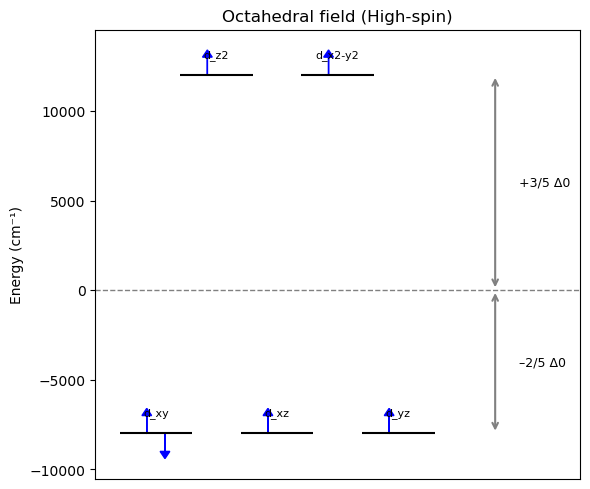

In [ ]:

import sys, os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from CoordChenTB.utils import complexorbitalssplitting as orbital
orbital.plot_cf(6, 20000, 'High-spin', 'octahedral', '3d')

#The code complexorbitalssplitting.py is interactive by itself you can launch it to test different complexes or directly test d1 through d10 high spin/low spin splitting diagrams.


## complexdrawerfinal.py

**Complexdrawerfinal.py** is a function which by using the metals_db database and our sdf files can draw coordination complexes in three geometries: octahedral, tetrahedral and square planar, and the used complexes can be monodentate or bidentate. It also determines the optimal geometry for complexes automatically if run by itself and calculates the total complex charge to display it on the drawn image.

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from CoordChenTB.utils import complexdrawerfinal as drawer

from CoordChenTB.utils.complexdrawerfinal import create_complex_from_ligand_dict


img = create_complex_from_ligand_dict(
    metal="Fe",
    ligand_counts={"py": 4}, 
    geometry="square_planar",
    oxidation_state=2,
    bond_length=1.2,
    output_file="complex.png"
)


img = create_complex_from_ligand_dict(
    metal="Zn",
    ligand_counts={"phen": 3}, 
    geometry="octahedral",
    oxidation_state=2,
    bond_length=1.2,
    output_file="complex.png"
)

#Run the sample of this code right here and an image of a complex will be made for you. The actual full code can estimate the geometry of the complex directly and doesn't ask for geometry
#To fully test the code you can simply launch complexdrawerfinal.py on itself it is interactive in the terminal

[02:49:53] WARNING: not removing hydrogen atom without neighbors
[02:49:53] WARNING: not removing hydrogen atom without neighbors
[02:49:55] WARNING: not removing hydrogen atom without neighbors
[02:49:55] WARNING: not removing hydrogen atom without neighbors


## metalandligandsinfo.py

Provides lookup tools for both metals and ligands, retrieving spectrochemical data, oxidation states, donor atoms, and confidence levels. Used in both CLI (core.py) and GUI (interfacefinalversion.py) interfaces for quick reference.

In [20]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from CoordChenTB.utils import metalandligandsinfo as info


info.print_metal_info("Fe")

#To further try the function you can again just launch the py file so metalandligandsinfo.py which is interactive (it even has fuzzy correction as most files when a ligand is typed wrong)




🧲 Metal: Fe
----------------------------------------
symbol              : Fe
atomic_number       : 26
block               : 3d
smiles              : [Fe]
atomic_weight       : 55.845
oxidation_states    : [2, 3]


## metals_db.py

This file defines the `METALS` list containing dictionaries for all relevant metal centers. Each entry has properties like symbol, atomic number, oxidation states, and RDKit SMILES. It is then used in several of the files as a database (in some of the files the list was just paster to avoid having to use relative imports when these files were called in other files).

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from CoordChenTB.utils.metals_db import METALS

for m in METALS[:5]:
    print(m)
#To see full detabase you can just check metals_db.py in utils

{'symbol': 'Sc', 'atomic_number': 21, 'block': '3d', 'smiles': '[Sc]', 'atomic_weight': 44.956, 'oxidation_states': [3]}
{'symbol': 'Ti', 'atomic_number': 22, 'block': '3d', 'smiles': '[Ti]', 'atomic_weight': 47.867, 'oxidation_states': [2, 3, 4]}
{'symbol': 'V', 'atomic_number': 23, 'block': '3d', 'smiles': '[V]', 'atomic_weight': 50.942, 'oxidation_states': [2, 3, 4, 5]}
{'symbol': 'Cr', 'atomic_number': 24, 'block': '3d', 'smiles': '[Cr]', 'atomic_weight': 51.996, 'oxidation_states': [2, 3, 6]}
{'symbol': 'Mn', 'atomic_number': 25, 'block': '3d', 'smiles': '[Mn]', 'atomic_weight': 54.938, 'oxidation_states': [2, 4, 7]}


## test_all.py

This file contains unit tests and is triggered automatically via GitHub Actions (`.github/workflows/tests.yml`) on every push or pull request. It ensures core functionalities work as expected by running a few test scenarios across modules. To run it by yourself you can simply write "pytest" in the git bash of the repository on your computer. 

## core.py

This is a command-line interface (CLI) that connects all functional parts of the toolbox : ligand generation, complex visualization, orbital splitting analysis and easy to retrive metal/ligands infos.

In [ ]:
!python ../src/CoordChenTB/core.py
#FOR SOME REASON THIS WON'T SIMPLY RUN THE CODE PLEASE SIMPLY RUN THE core.py
#This code is just the core of the project so it fuses all functionalities together you can launch it by itself again it is 
#interactive and basically assembles complexorbitalssplitting.py, complexdrawerfinal.py and metalandligandsinfo.py and we 
#tried directly integrating a launch of interfacefinalversion.py but it did not work (you will see it when running this file)

^C


## interfacefinalversion.py

This is the GUI entry point for the project. Running `interfacefinalversion.py` launches a Tkinter-based app with tabs for:
- Complex Builder
- Orbital Splitting Analysis
- Metal & Ligand Info Lookup

It provides a user-friendly way to explore coordination chemistry visually.

In [26]:
!python ../src/CoordChenTB/utils/interfacefinalversion.py
#Opens the GUI you can fully explore its functionalites which are the same as core.py so a fusion of the functionalites of our previous functions


[03:10:19] WARNING: not removing hydrogen atom without neighbors
[03:10:19] WARNING: not removing hydrogen atom without neighbors
